# Prueba 1

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from xml.dom import minidom

In [30]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
df= df.fillna(1)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,1.0,0.0,1.0,1.0,0.0,1.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,1.0,0.0,1.0,1.0,0.0,1.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,1.0,0.0,1.0,1.0,0.0,1.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,1.0,0.0,1.0,1.0,0.0,1.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,1.0,0.0,1.0,1.0,0.0,1.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-05,1.0,0.0,1.0,1.0,0.0,1.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-06,1.0,0.0,0.0,1.0,0.0,0.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-07,1.0,0.0,0.0,1.0,0.0,0.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-08,1.0,0.0,0.0,1.0,0.0,0.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-01-09,1.0,0.0,0.0,1.0,0.0,0.0,...,1803.987,1.0,597.029,9.59,1.0,1.0,37.746,0.5,64.83,0.498


In [31]:
df = df[df['location'].isin(['Nicaragua'])]
df = df.loc[:,['date','total_cases','iso_code']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-30", FMT)).days)
df

,date,total_cases,iso_code
38578,80,1.0,NIC
38579,81,1.0,NIC
38580,82,2.0,NIC
38581,83,2.0,NIC
38582,84,2.0,NIC
38583,85,2.0,NIC
38584,86,2.0,NIC
38585,87,2.0,NIC
38586,88,2.0,NIC
38587,89,2.0,NIC


## Regresion Lineal

Ecuación
m = [29.22685411] b = -3104.023020299753
Predicción
[4436.5053394]


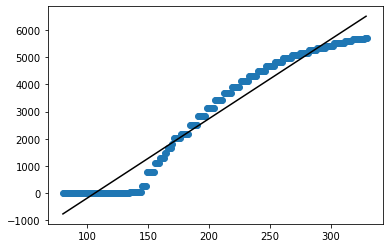

In [16]:
x = list(df.iloc [:, 0]) 
y = list(df.iloc [:, 1])
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print("Ecuación")
print('m = ' + str(regr.coef_) + ' b = ' + str(regr.intercept_))
print("Predicción")
y_predict = regr.predict([[len(x)+7]])
print(y_predict)
plt.scatter(x,y)
x_real = np.array(range(min(x),max(x)))
plt.plot(x_real, regr.predict(x_real.reshape(-1,1)), color='black')
plt.show()

## Regresion exponencial

Predicción
29806.712715412792


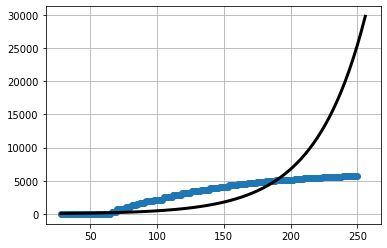

In [32]:
xexp = np.arange(1,len(df)+1,1)
yexp = np.array(df.values[:,1],dtype='float')
xexp = xexp[27:len(xexp)-1]
yexp = yexp[27:len(yexp)-1]
curve_fit=np.polyfit(xexp,np.log(yexp),1)
pred_x=np.array(list(range(min(xexp),max(xexp)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
print("Predicción")
print(yx[len(yx)-1])
plt.plot(xexp,yexp,"o")
plt.plot(pred_x,yx,color='black',linewidth=3.0)
plt.grid(True)
plt.show()

## Regresion Polinomico

Predicción
4812.759467256569


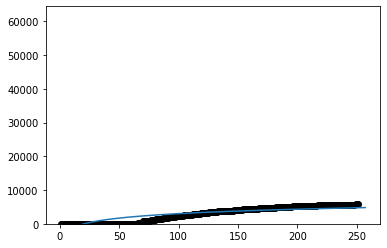

In [35]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)
xlog = np.arange(1,len(df)+1,1)
ylog = np.array(df.values[:,1]) 
exp_fit = curve_fit(modelo_logistico,xlog,ylog) 
pred_x = list(range(min(xlog),max(xlog)+7))
plt.scatter(xlog,ylog,color='black')
val = [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
print("Predicción")
print(val[len(pred_x)-1])
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x])
plt.ylim(0,max(y)*2)
plt.show()

## Regresion Logaritmica

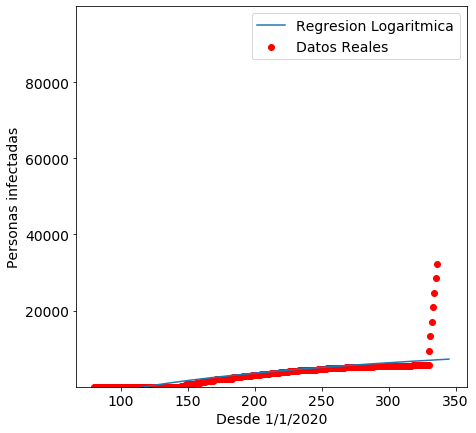

Contagios proximos 7 dias:  [7268.221124911819]


In [40]:
def modelo_logistico(x,a,b):
    res= a+b*np.log(x)
    return res
exp_fit = curve_fit(modelo_logistico,x,y)
pred_x = list(range(min(x),max(x)+10))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Regresion Logaritmica" )
plt.legend()
plt.xlabel("Desde 1/1/2020")
plt.ylabel("Personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1))
plt.show()
print("Contagios proximos 7 dias: ",[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x][-1:])

## Modelo con datos

media
3235.0133928571427
mediana
3787.0
Predicción
62530


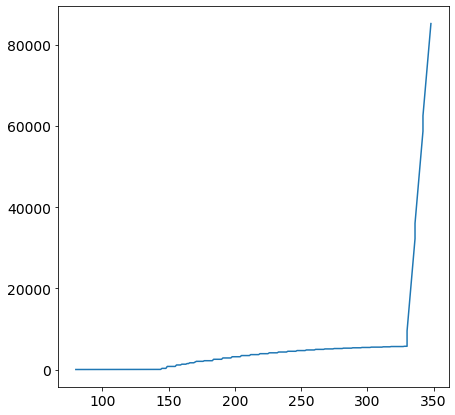

Predicción
89039


In [42]:
filtro = df['total_cases'][27:]
media = filtro.mean()
mediana = filtro.median()
print("media")
print(media)
print("mediana")
print(mediana)
print("Predicción")
print(int(y[-1] + mediana))
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1]+mediana))
predict = int(y[-1] + mediana)
plt.plot(x,y)
plt.show()
print("Predicción")
print(predict)

## Mejor modelo

En base a lo observado el modelo que tiene mejor prediccion es el "Polinomico" ya que este da un resultado mas exacto.

## 	Ventajas y desventajas de los modelos.

-Ventajas  
El modelo lineal es facil de implementar  
El modelo logaritmico es facil de modelar  
EL modelo exponencial no necesita muchos de datos historicos  
El modelo polinomial se usa con datos no lienales  
-Desventajas  
El modelo lineal no se puede utilizar con ecuaciones complejas  
El modelo logoritmico solo usa datos lineales  
El modelo exponencial no modela correlaciones  
El modelo polinomial necesita datos especificos  

## Cual es el principal problema del modelo probabilistico

Su principal problema es manejar una cantidad de numeros muy grandes, ya que su resultado es inexacto 